In [1]:
# Import the necessary packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [2]:
# import iris dataset from seaborn

iris=sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [4]:
#check uniques species
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [5]:
# drop rows with class label 'versicolor' 
#iris = iris[iris['species'] != 'versicolor']

In [6]:
#split the data into features and target

X =iris.drop('species', axis=1)
y=iris['species']

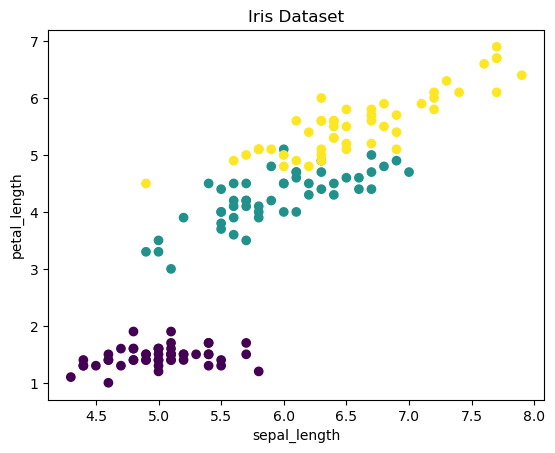

In [7]:
y_map = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
y_changed = y.map(y_map)

# Plot the dataset
plt.scatter(X['sepal_length'], X['petal_length'], c=y_changed, cmap='viridis')
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.title('Iris Dataset')
plt.show()

In [8]:
# Create a DecisionTreeClassifier model
rf = RandomForestClassifier()

# Fit the model to the data
rf.fit(X, y)

# model accuracy
print('Model Accuracy:', rf.score(X, y))


Model Accuracy: 1.0


In [14]:
rf.feature_importances_  #they should add up to 1 or 100% representing the importance of each feature in our dataset

array([0.07893625, 0.01817973, 0.46115418, 0.44172984])

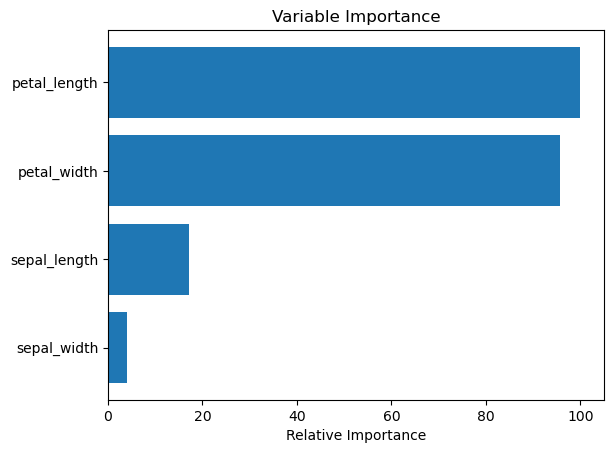

In [13]:
# visualize feature importance
feature_importance = rf.feature_importances_

# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()
